In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

#Logistic Regression

In [2]:
data1 = pd.read_csv('ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])

In [3]:
data1.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


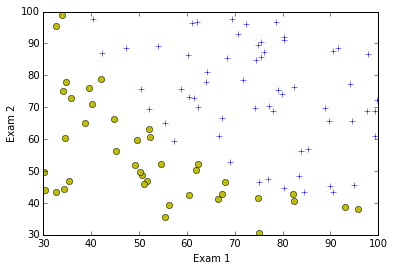

In [4]:
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.plot(data1[data1['Admitted'] == 0]['Exam1'], data1[data1['Admitted'] == 0]['Exam2'], 'yo')
plt.plot(data1[data1['Admitted'] == 1]['Exam1'], data1[data1['Admitted'] == 1]['Exam2'], 'b+')

plt.show()

In [5]:
from sklearn import linear_model

In [6]:
clf = linear_model.LogisticRegression(penalty='l1', C = 1)
clf.fit(data1[['Exam1', 'Exam2']].values, data1['Admitted'].values)
print clf.score(data1[['Exam1', 'Exam2']].values, data1['Admitted'].values)
print clf.coef_
print clf.intercept_

0.91
[[ 0.09777323  0.0916492 ]]
[-11.55942281]


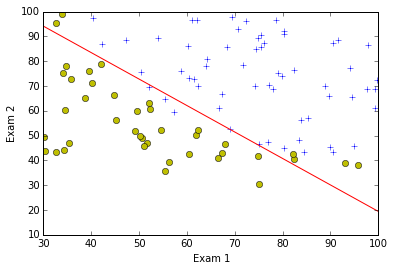

In [7]:
xx = np.linspace(30, 100, 100)
yy = -(clf.coef_[:, 0] * xx + clf.intercept_) / clf.coef_[:, 1]

plt.figure()
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.plot(data1[data1['Admitted'] == 0]['Exam1'], data1[data1['Admitted'] == 0]['Exam2'], 'yo')
plt.plot(data1[data1['Admitted'] == 1]['Exam1'], data1[data1['Admitted'] == 1]['Exam2'], 'b+')
plt.plot(xx, yy, color='r', label='decision boundary');

plt.show()

#Regularized logistic regression

In [8]:
data2 = pd.read_csv('ex2data2.txt', header=None, names=['Test1', 'Test2', 'y'])

In [9]:
data2.head()

,Test1,Test2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


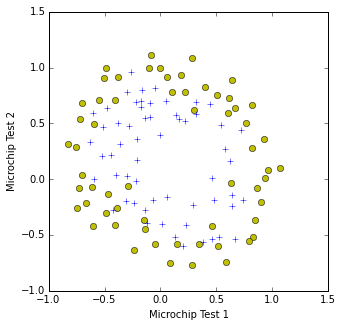

In [10]:
plt.figure(figsize=(5,5))

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.plot(data2[data2['y'] == 0]['Test1'], data2[data2['y'] == 0]['Test2'], 'yo')
plt.plot(data2[data2['y'] == 1]['Test1'], data2[data2['y'] == 1]['Test2'], 'b+')

plt.show()

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
poly = PolynomialFeatures(degree=6)
trans = poly.fit_transform(data2[['Test1', 'Test2']])

In [13]:
clf2 = linear_model.LogisticRegression(penalty='l1', C = 1)
clf2.fit(trans, data2['y'].values)
print clf2.score(trans, data2['y'].values)
print clf2.coef_
print clf2.intercept_

0.796610169492
[[ 1.11737035  0.68663981  1.28043066 -4.86270678 -1.62179617 -2.34262624
   0.          0.          0.          0.          0.          0.          0.
   0.         -2.36719239  0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.        ]]
[ 0.75237605]


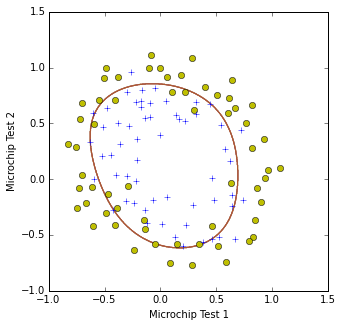

In [14]:
plt.figure(figsize=(5,5))

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.plot(data2[data2['y'] == 0]['Test1'], data2[data2['y'] == 0]['Test2'], 'yo')
plt.plot(data2[data2['y'] == 1]['Test1'], data2[data2['y'] == 1]['Test2'], 'b+')

dim = np.linspace(-1, 1.5, 1000)
xx, yy = np.meshgrid(dim, dim)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf2.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

plt.show()

##overfitting

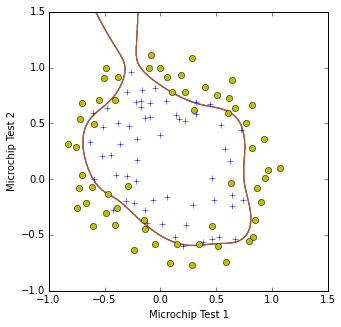

In [15]:
clf2_over = linear_model.LogisticRegression(penalty='l1', C = 1000)
clf2_over.fit(trans, data2['y'].values)

plt.figure(figsize=(5,5))

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.plot(data2[data2['y'] == 0]['Test1'], data2[data2['y'] == 0]['Test2'], 'yo')
plt.plot(data2[data2['y'] == 1]['Test1'], data2[data2['y'] == 1]['Test2'], 'b+')

dim = np.linspace(-1, 1.5, 1000)
xx, yy = np.meshgrid(dim, dim)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf2_over.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

plt.show()

##underfitting

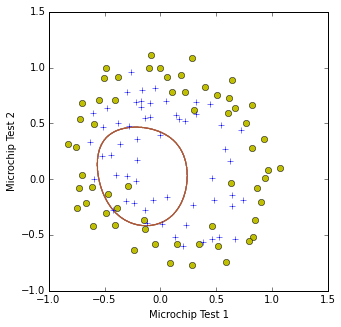

In [16]:
clf2_under = linear_model.LogisticRegression(penalty='l2', C = 0.01)
clf2_under.fit(trans, data2['y'].values)

plt.figure(figsize=(5,5))

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.plot(data2[data2['y'] == 0]['Test1'], data2[data2['y'] == 0]['Test2'], 'yo')
plt.plot(data2[data2['y'] == 1]['Test1'], data2[data2['y'] == 1]['Test2'], 'b+')

dim = np.linspace(-1, 1.5, 1000)
xx, yy = np.meshgrid(dim, dim)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
Z = clf2_under.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)

plt.show()